In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

In [3]:
## set seed for reproducible results
rng = np.random.default_rng(seed = 42)
# Creates 500 random numbers from a uniform distirbution (0,1), multiply by 20 to scale
X = 20*rng.random(500)

# Create 500 y values from x with some "jitter" based on STD Normal Distribution, scaled by 10
y = X + 2*rng.standard_normal(500)

In [4]:
# moving data into pandas data frame
# not really necessary, but a lot of csv's or other files are read into pandas dataframes
# so this can create a workflow that handles that
data = {'X1': X, 'y' : y}
df = pd.DataFrame(data)
df.head()

,X1,y
0,15.479121,18.345550
1,8.777569,8.960609
2,17.171958,18.333513
3,13.947361,13.833794
4,1.883547,1.542732


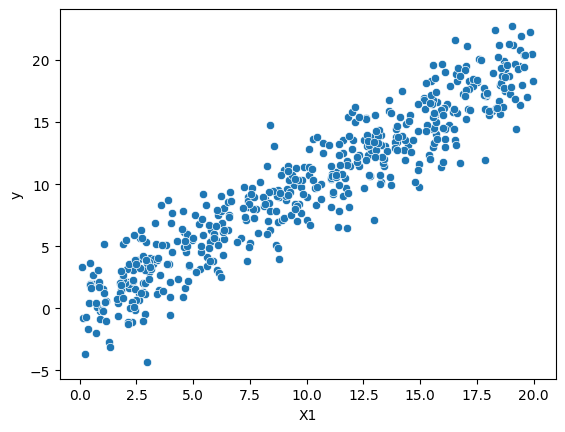

In [5]:
# Let's just see what our simulated data looks like
sns.scatterplot(data = df, x = 'X1', y = 'y')
plt.show()

In [6]:
# typically, you'd do some EDA to look for potential features for prediction
# from above, clearly X1 is a useful feature, we seperate the inputs and target
inputsX = df[['X1']]
targetY = df[['y']]

# split training and test data to protect against overfitting
# could hardcode this but we'll just use SKL's built in for convience
X_train, X_test, y_train, y_test = train_test_split(inputsX, targetY, test_size=0.25, random_state=42)

In [7]:
### initialize paramters for the model setting all to 0, this is the w-vector in y(X) = X*w
### it is the number of features/predictors in the model, plus 1 for the intercept (w_0)

def init_parameters(X):

    # get input data dimensions
    numrows, numcols = X.shape
    # intialize parameters as 0's
    parameters = np.zeros(numcols + 1)
    parameters = parameters.reshape(parameters.size, 1)
    return parameters

In [8]:
w = init_parameters(X_train)

In [9]:
# checking matrix algebra for predictions
# we see we need x_train to have the column of constant 1's at the start
yp = np.dot(X_train, w)

ValueError: shapes (375,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [10]:
# note this will append a new column at the end of a copy of the dataframe
# so our intercept coefficient will actually be at the end of the list
newX_train = X_train.assign(CONST = 1)

In [11]:
newX_train.shape

(375, 2)

In [12]:
#rechecking matrix algebra for prediction
yp = np.dot(newX_train, w)
yp.shape

(375, 1)

In [13]:
# didn't actually modify the X_train series
X_train.shape

(375, 1)

In [14]:
# checking error calculation---vector subtraction seems to work!
yp - y_train

,y
227,-10.660889
417,-16.493110
203,-2.007135
126,-7.493423
329,-5.358946
...,...
106,-7.312303
270,-0.509379
348,-6.455849
435,-6.908246


In [15]:
def grad_descent(X, y, parameters, num_iter = 10000, h = 0.001):
    

    ### we just want to pass in our inputs X and without having to think about inserting the column of 1's
    ### so we do that here first
    newX = X.assign(CONST = 1)
    w = parameters
    ### extract the num of rows for our "n" value in the gradient
    n, cols = X.shape
    

    for i in range(num_iter):
        # first calculate predicted values
        y_p = np.dot(newX, w)
        
        # compute the gradient of the loss function L(w)
        dLdw = (2/n) * np.dot(newX.T, (y_p - y))
        # update coefficients 
        w = (w - h*dLdw)

    # send back final parameters
    

    return w

In [16]:
wvector = grad_descent(X_train, y_train, w, num_iter=10000, h = 0.001)

In [17]:
wvector

array([[ 0.99220575],
       [-0.06066871]])

In [18]:
for i in range(len(wvector)):
    if i != len(wvector) -1 :
        print('Coefficients: w_%s : %f' %(i+1,wvector[i]))
    else:
        print('Intercept: w_0 : %f' % wvector[-1])

Coefficients: w_1 : 0.992206
Intercept: w_0 : -0.060669


In [19]:
### looks like it works, lets take this fitted model and use it to predict some values!

def predict(X_test, parameters):

    newXtest = X_test.assign(CONST = 1)
    w = parameters

    predicted_values = np.dot(newXtest, w)

    return predicted_values
    


In [20]:
pred_values = predict(X_test, wvector)

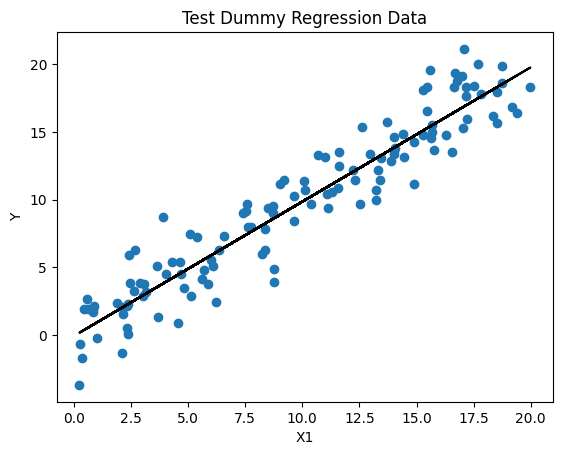

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred_values, color = 'black')
plt.title("Test Dummy Regression Data")
plt.xlabel("X1")
plt.ylabel("Y")

plt.show()

In [ ]:
### now to compare with sklearn model fitting!

In [22]:
#### compare against sklearn calculation
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
print(reg.coef_)
print(reg.intercept_)

[[0.99228258]]
[-0.06168407]
